## Classification using Decision Tree

Pada praktik kali ini, kita akan coba mengembangkan model Decision Tree yang dapat memprediski apakah seseorang beresiko menderita diabetes atau tidak.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


## Load dataset

In [3]:
df = pd.read_csv("./dataset/patient_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Exploration
Pisahkan X dan Y dari dataset

Salah satu kelebihan algoritma Decision Tree adalah kita tidak perlu menormalisasi feature.

In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

print(X,'\n')
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1

## Spliting Data
Split data menjadi:

training set (X_train, y_train)
test set (X_test, y_test)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Modeling
Algoritma Decision Tree memiliki banyak hyperparameter yang bisa kita setel (tuning hyperparameter). Empat diantaranya adalah:

##### Note:
Jika kita tidak tahu secara pasti kegunaan hyperparameter, kita bisa menggunakan setelan default dengan cara mengosongkan hyperparameter.

In [6]:
# Model dengan hyperparameter default
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, Y_train)

# Model dengan tuning hyperparameter
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3,max_leaf_nodes=4, random_state=25 )
model_DT = model_DT.fit(X_train, Y_train)

# Evalution
Mengevaluasi performa model dengan Hyperparameter Default

In [7]:
# hasil prediksi training set
Y_pred_train_default = model_default.predict(X_train)
# hasil prediksi testing set
y_pred_default = model_default.predict(X_test)

#training set score
print("train Accuracy: ", metrics.accuracy_score(Y_train, Y_pred_train_default))
print("train precission :", metrics.accuracy_score(Y_train, Y_pred_train_default))
print("train recall :", metrics.accuracy_score(Y_train, Y_pred_train_default),'\n')

#testing set score
print("test Accuracy: ", metrics.accuracy_score(Y_test, y_pred_default))
print("test precission :", metrics.accuracy_score(Y_test, y_pred_default))
print("test recall :", metrics.accuracy_score(Y_test, y_pred_default),'\n')

train Accuracy:  1.0
train precission : 1.0
train recall : 1.0 

test Accuracy:  0.7337662337662337
test precission : 0.7337662337662337
test recall : 0.7337662337662337 



Berdasarkan hasil evaluasi performa:

model dengan hyperparameter default mengalami overfitting
model dengan tuning hyperparameter sudah good fit, meskipun memiliki train set score yang lebih rendah

## Generate Classification Report

Kita juga dapat menampilkan hasil evaluasi model menggunakan classification report.

In [8]:
nama_label = ['tidak berpotensi diabetes', 'berpotensi diabetes']

print('classification report model dengan hyperparameter default:\n')
print(classification_report(Y_test, y_pred_default, target_names=nama_label))

print('\n\n Classification report model dengan tuning hyperparameter:\n')
print(classification_report(Y_test, y_pred_default,target_names=nama_label))

classification report model dengan hyperparameter default:

                           precision    recall  f1-score   support

tidak berpotensi diabetes       0.82      0.75      0.78        99
      berpotensi diabetes       0.61      0.71      0.66        55

                 accuracy                           0.73       154
                macro avg       0.72      0.73      0.72       154
             weighted avg       0.75      0.73      0.74       154



 Classification report model dengan tuning hyperparameter:

                           precision    recall  f1-score   support

tidak berpotensi diabetes       0.82      0.75      0.78        99
      berpotensi diabetes       0.61      0.71      0.66        55

                 accuracy                           0.73       154
                macro avg       0.72      0.73      0.72       154
             weighted avg       0.75      0.73      0.74       154



Classification report menampilkan informasi yang lebih detail dan banyak dibanding evaluation metrics.

# Men-Generate Tree
Tree Model dengan Hyperparameter Default

Berhasil menyimpan gambar


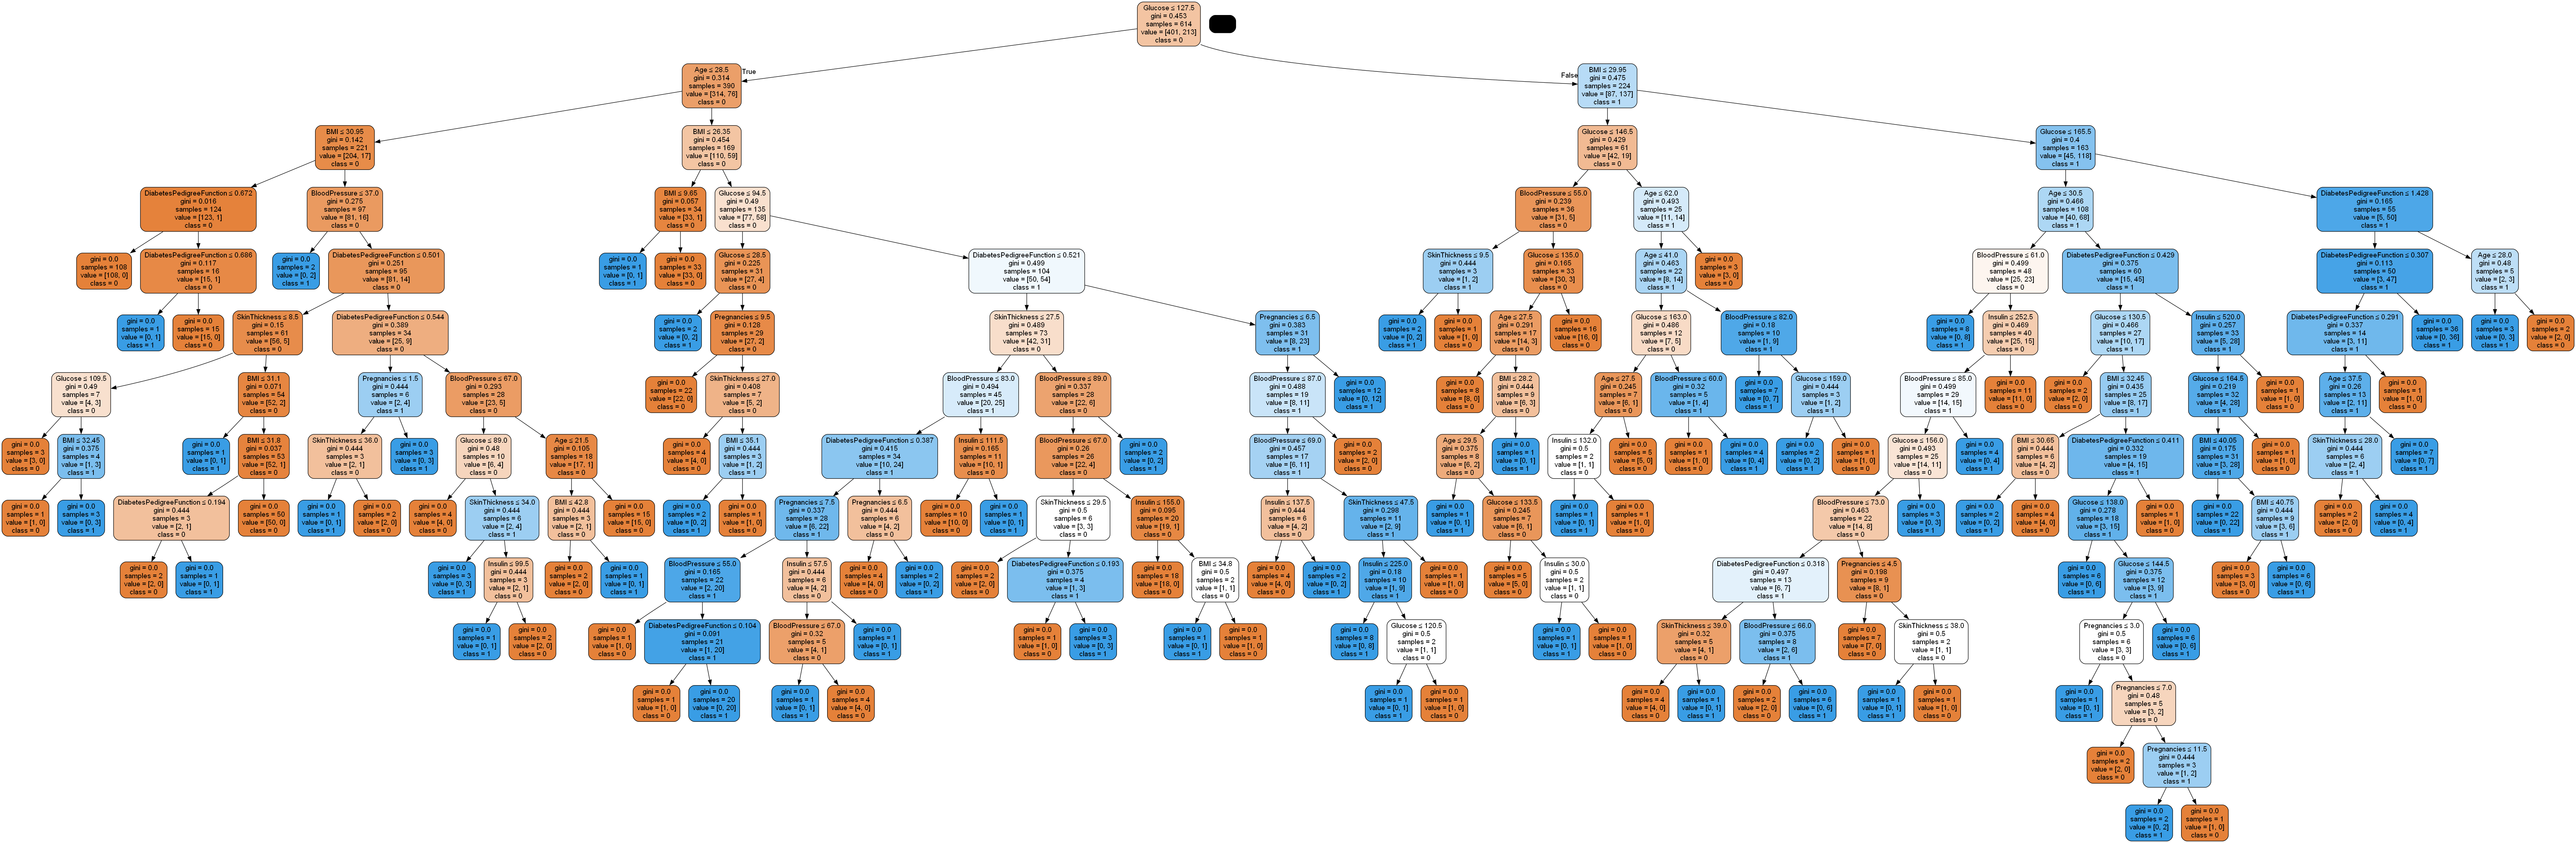

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os

# Ganti path di bawah dengan path ke direktori instalasi Graphviz di sistem Anda
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'


features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

# Gantikan `model_default` dengan model Anda
export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features_cols,
                class_names=['0','1']
                )

# Ganti path dan nama file sesuai dengan kebutuhan Anda
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
try:
    graph.write_png('tree_model_default.png')
    print("Berhasil menyimpan gambar")
except Exception as e:
    print("Terjadi kesalahan saat menyimpan gambar:", e)
Image(graph.create_png())


Tree Model dengan Tuning Hyperparameter

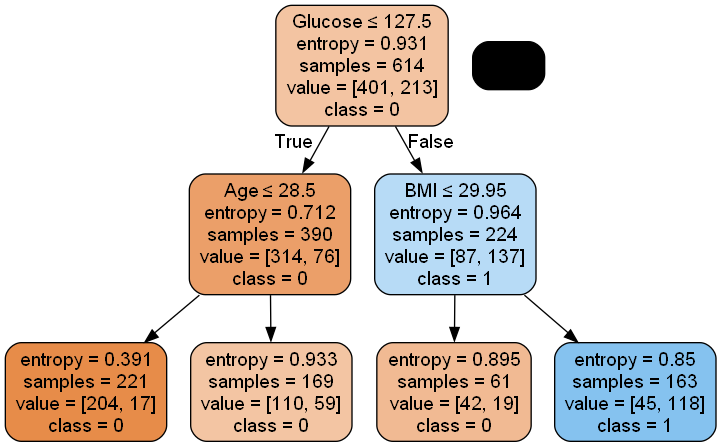

In [11]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features_cols,
                class_names=['0','1']
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

Perhitungan Skor Feature

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

Feature: Pregnancies Score: 0.05167929956907748 %


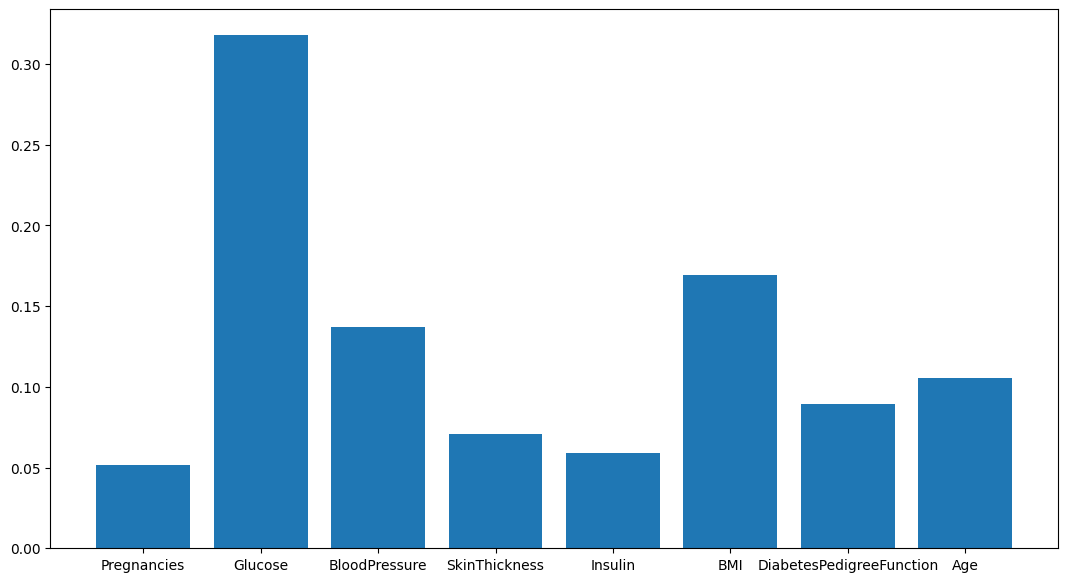

Feature: Glucose Score: 0.31785528100103366 %


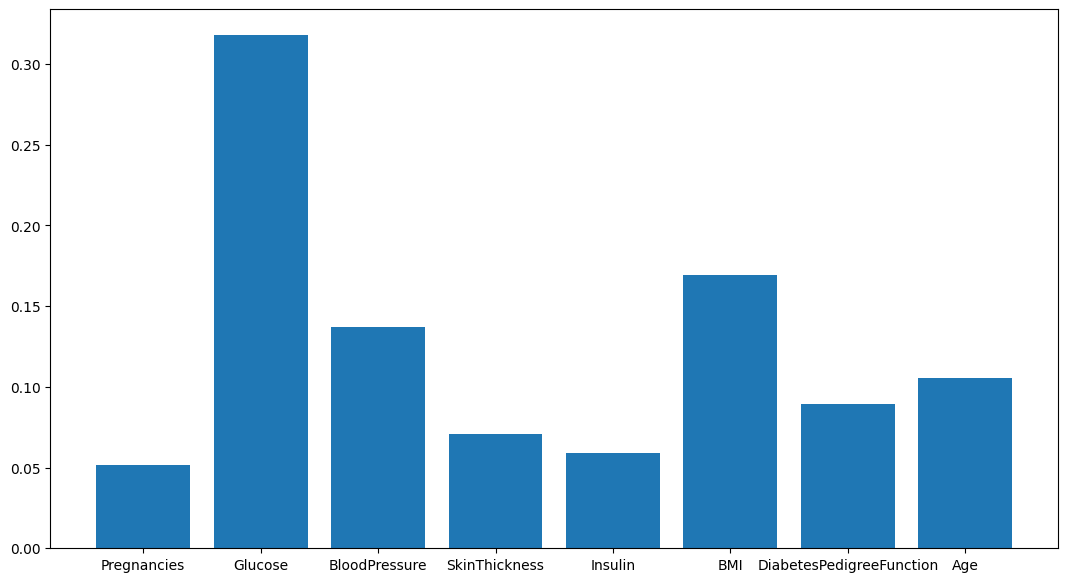

Feature: BloodPressure Score: 0.13675302274940554 %


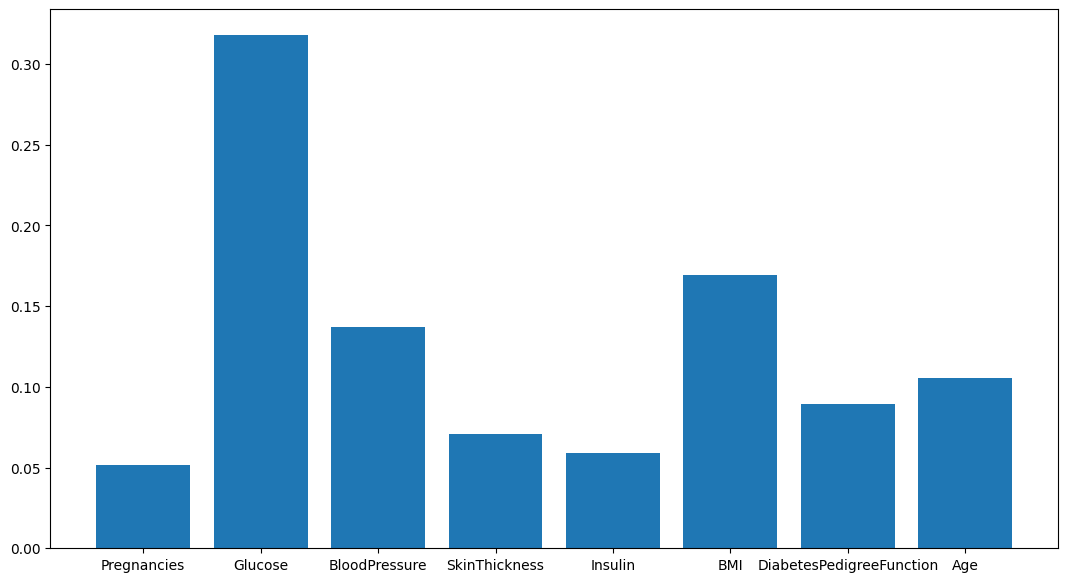

Feature: SkinThickness Score: 0.0707485864471246 %


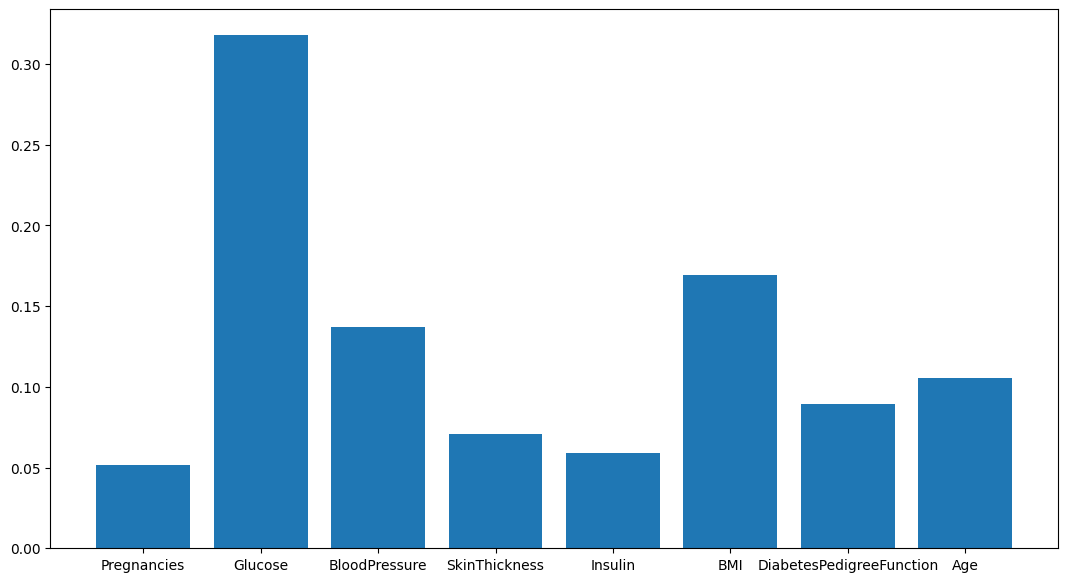

Feature: Insulin Score: 0.05871986785554008 %


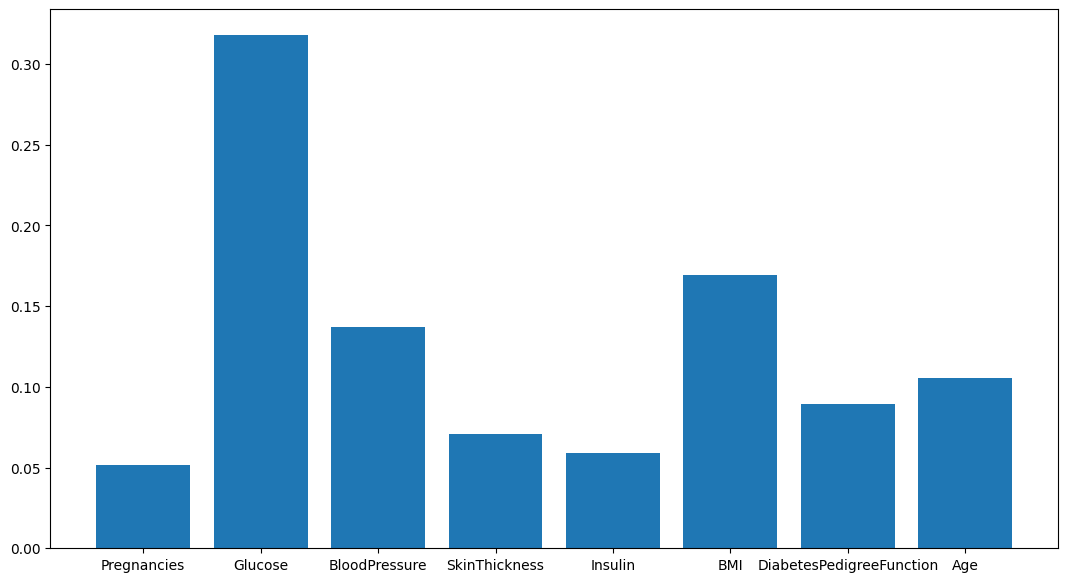

Feature: BMI Score: 0.16926262731282504 %


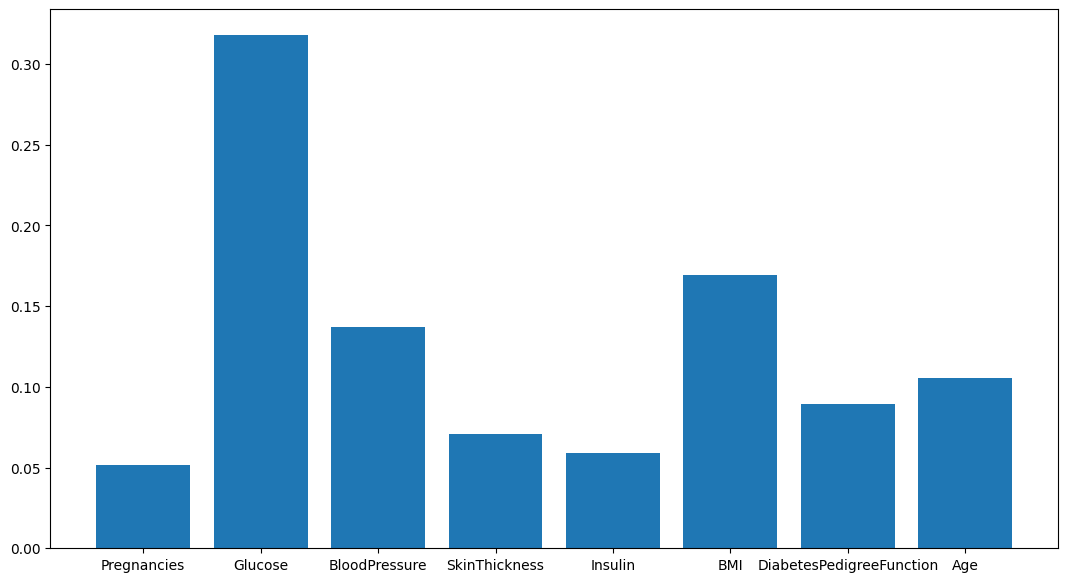

Feature: DiabetesPedigreeFunction Score: 0.0892962154658552 %


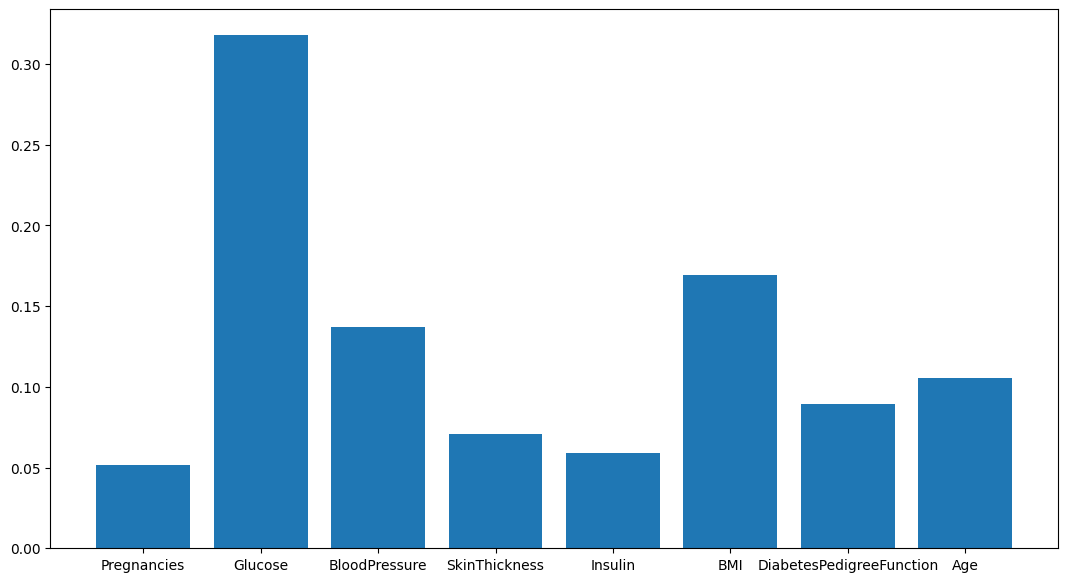

Feature: Age Score: 0.10568509959913837 %


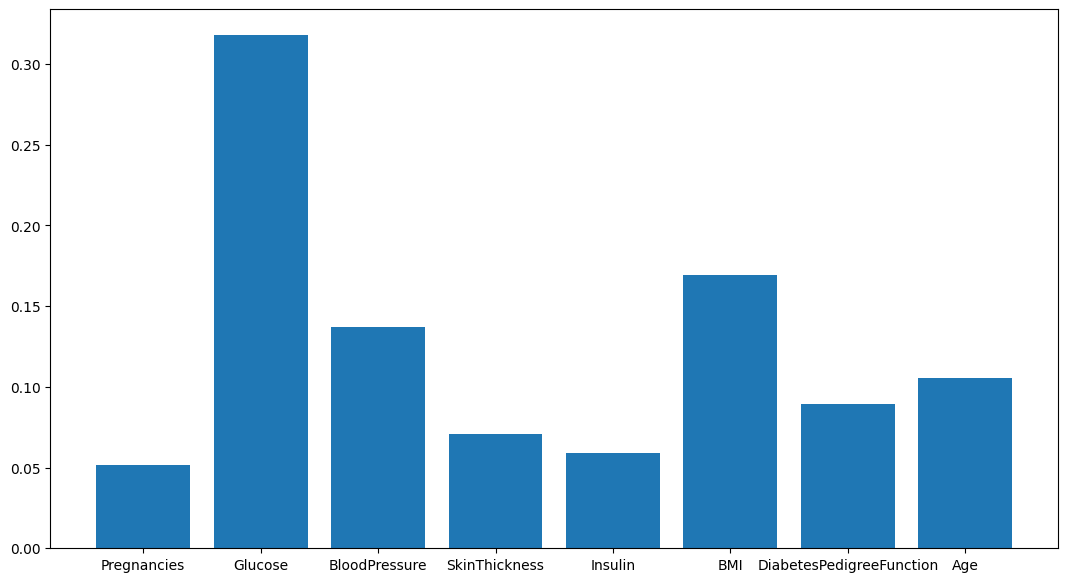

In [12]:
importance = model_default.feature_importances_

for i, v in enumerate(importance):
    print('Feature:', features_cols[i], 'Score:', v , '%')

    plt.figure(figsize=(13,7))
    plt.bar([x for x in features_cols], importance)
    plt.show()

# Kesimpulan
Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model.

In [15]:
# prediksi data baru menggunakan model dengan model tuning hyperparameter

#Input data baru
pregnancies = float(input('Input pregnancies = '))
glucose = float(input('Input glucose = '))
bloodPressure = float(input('Input bloodPressure = '))
skinThickness = float(input('Input skinThickness = '))
insulin = float(input('Input insulin = '))
bmi = float(input('Input bmi = '))
diabetesPedigreeFunction = float(input('Input diabetesPedigreeFunction = '))
age = float(input('Input age = '))
data_baru = [[pregnancies, glucose, bloodPressure, skinThickness, insulin, bmi, diabetesPedigreeFunction, age]]

#memprediksi data baru
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

#cetak hasil prediksi
if hasil_prediksi == 0:
    print('pregnancies :', pregnancies)
    print('glucose :', glucose)
    print('bloodPressure :', bloodPressure)
    print('skinThickness :', skinThickness)
    print('insulin :', insulin)
    print('bmi :', bmi)
    print('diabetesPedigreeFunction :', diabetesPedigreeFunction)
    print('age :', age)

    print('\n Tidak berpotensi menderita diabetes')
else:
    print('pregnancies :', pregnancies)
    print('glucose :', glucose)
    print('bloodPressure :', bloodPressure)
    print('skinThickness :', skinThickness)
    print('insulin :', insulin)
    print('bmi :', bmi)
    print('diabetesPedigreeFunction :', diabetesPedigreeFunction)
    print('age :', age)

    print('\n Berpotensi menderita diabetes')


pregnancies : 20.0
glucose : 50.0
bloodPressure : 60.0
skinThickness : 70.0
insulin : 50.0
bmi : 40.0
diabetesPedigreeFunction : 40.0
age : 40.0

 Tidak berpotensi menderita diabetes
